In [3]:
import numpy as np
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, module_path + '/src')

import utility
import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sktime.transformations.panel.catch22_features import Catch22
import numpy as np
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sktime.classification.compose import TimeSeriesForestClassifier

import time as time

In [8]:
X, y = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleWheezeSameLength.ts')
X_train, X_test, y_train, y_test = train_test_split(X, y)

labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['0' '1' '2' '3'] [1392  663 2750  368]


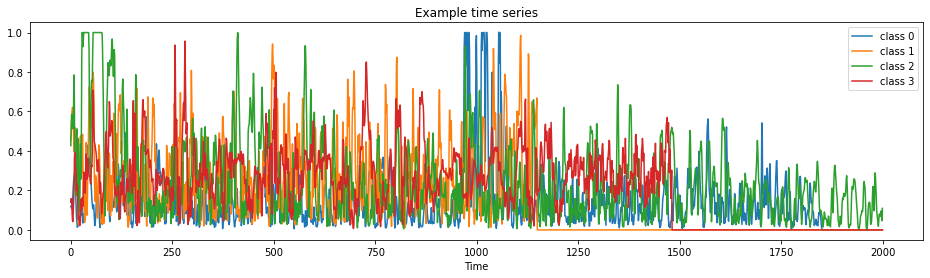

In [9]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
for label in labels:
    X_train.loc[y_train == label, "dim_0"].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend()
ax.set(title="Example time series", xlabel="Time");

# Trying catch22 on a permutation of the dataset

In [ ]:
indices = np.random.RandomState(0).permutation(3000)
X, y = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleWheezeSameLength.ts')
X, y = shuffle(X, y, random_state=0)


c22f = Catch22()
c22f.fit(X.iloc[indices], y[indices])
X = c22f.transform(X.iloc[indices])


X_train, X_test, y_train, y_test = train_test_split(X, y[indices])

labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

Comment out the last line in the code below to run the 

In [16]:

def get_KNN_grid():
    leaf_size = list(range(1,5))
    n_neighbors = list(range(1,3))
    p=[1,2]
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
    knn= KNeighborsClassifier()
    return GridSearchCV(knn, hyperparameters, cv=5)
def get_SVM_grid():
    param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
    return GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 5) 
def get_ANN_grid():
    parameter_space = {
    'hidden_layer_sizes': [(1000,500), (1000,500, 250)],
    'activation': [ 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05]}
    return GridSearchCV(MLPClassifier(), parameter_space, cv=5)
def get_random_forest_grid():
    parameters = {
    'n_estimators'      : [100,200,300],
    'max_depth'         : [8, 10, 12],
    'random_state'      : [0]}
    return GridSearchCV(RandomForestClassifier(), parameters, cv=5)

grids = {
    'SVM': get_SVM_grid(),
    'KNN': get_KNN_grid(),
    'ANN': get_ANN_grid(),
    'random_forest': get_random_forest_grid()
}


def run_grid_search(classifiers, X_train, y_train):
    classifier_dict = {}
    for classifier in classifiers:
        grid = grids[classifier]
        grid.fit(X_train, y_train)
        classifier_dict[classifier] = grid.best_estimator_
    return classifier_dict 

#classifier_dict = run_grid_search(['random_forest','SVM'], X_train_c22, y_train[indices_train])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.530, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.530, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.530, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.520, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.440, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.500, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.530, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.510, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.520, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.470, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.4s finished


In [11]:
classifier_dict = {'random_forest': RandomForestClassifier(max_depth=8, n_estimators=300, random_state=0),
 'SVM': SVC(C=1, gamma=0.01)}

clf = classifier_dict['SVM']
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.38      0.15      0.21       123
           1       0.50      0.01      0.03        70
           2       0.59      0.94      0.72       283
           3       0.00      0.00      0.00        24

    accuracy                           0.57       500
   macro avg       0.37      0.27      0.24       500
weighted avg       0.50      0.57      0.46       500



/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
